In [1]:
from django.db import connection
from graphviz import Source
from IPython.display import Image
import pandas as pd

pd.options.display.max_rows = 10

## Using SQL

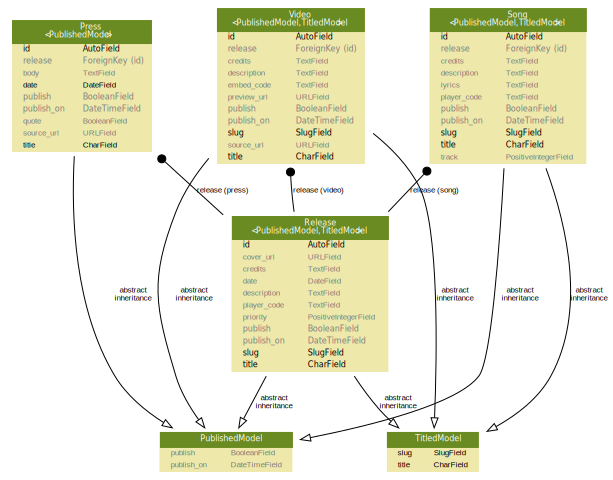

In [2]:
dot = !/Users/brian/Code/jahhills.com/hth/manage.py graph_models music 2>/dev/null
Source(dot.n)

In [3]:
songs = pd.read_sql("""
SELECT
    id AS song_id
    , title AS song_title
    , release_id
FROM music_song
""", connection)

songs.head()

,song_id,song_title,release_id
0,1,Sleeper Agent (Just Waking Up),1
1,2,Wave Backwards To Massachusetts,1
2,3,Hallelujah The Hills,1
3,4,The House Is All Lit Up,1
4,5,Raise The Flag Of Your Sibling's Favorite Dayd...,1


In [4]:
releases = pd.read_sql("""
SELECT
    id AS release_id
    , title AS release_title
    , date AS release_date
FROM music_release
""", connection)

releases.head()

,release_id,release_title,release_date
0,1,Collective Psychosis Begone,2007-06-05
1,2,Prepare To Qualify EP,2008-04-08
2,3,Colonial Drones,2009-09-22
3,7,No One Knows What Happens Next,2012-05-22
4,9,Portrait Of The Artist As A Young Trashcan,2013-05-07


In [5]:
song_releases = songs.merge(releases).set_index('song_id')
song_releases.head()

,song_title,release_id,release_title,release_date
song_id,,,,
1,Sleeper Agent (Just Waking Up),1,Collective Psychosis Begone,2007-06-05
2,Wave Backwards To Massachusetts,1,Collective Psychosis Begone,2007-06-05
3,Hallelujah The Hills,1,Collective Psychosis Begone,2007-06-05
4,The House Is All Lit Up,1,Collective Psychosis Begone,2007-06-05
5,Raise The Flag Of Your Sibling's Favorite Dayd...,1,Collective Psychosis Begone,2007-06-05


In [6]:
release_tracks = song_releases.groupby('release_title')['song_title'].count()
release_tracks

release_title
A Band Is Something To Figure Out             11
Collective Psychosis Begone                   12
Colonial Drones                               13
Have You Ever Done Something Evil?            12
Juvenile Oratorios EP                          4
Movement Scorekeepers                          7
No One Knows What Happens Next                10
Portrait Of The Artist As A Young Trashcan    21
Name: song_title, dtype: int64

In [7]:
release_tracks.describe()

count     8.000000
mean     11.250000
std       4.949747
min       4.000000
25%       9.250000
50%      11.500000
75%      12.250000
max      21.000000
Name: song_title, dtype: float64

## CSV Import/Export

In [8]:
song_releases.to_csv('song-releases.csv')
!head song-releases.csv

song_id,song_title,release_id,release_title,release_date
1,Sleeper Agent (Just Waking Up),1,Collective Psychosis Begone,2007-06-05
2,Wave Backwards To Massachusetts,1,Collective Psychosis Begone,2007-06-05
3,Hallelujah The Hills,1,Collective Psychosis Begone,2007-06-05
4,The House Is All Lit Up,1,Collective Psychosis Begone,2007-06-05
5,Raise The Flag Of Your Sibling's Favorite Daydream,1,Collective Psychosis Begone,2007-06-05
6,(crux of the camera man),1,Collective Psychosis Begone,2007-06-05
7,Slow Motion Records Broken At Break Neck Speeds,1,Collective Psychosis Begone,2007-06-05
8,Effie's On The Other Side,1,Collective Psychosis Begone,2007-06-05
9,The Trap,1,Collective Psychosis Begone,2007-06-05


In [9]:
pd.read_csv('song-releases.csv').head()

,song_id,song_title,release_id,release_title,release_date
0,1,Sleeper Agent (Just Waking Up),1,Collective Psychosis Begone,2007-06-05
1,2,Wave Backwards To Massachusetts,1,Collective Psychosis Begone,2007-06-05
2,3,Hallelujah The Hills,1,Collective Psychosis Begone,2007-06-05
3,4,The House Is All Lit Up,1,Collective Psychosis Begone,2007-06-05
4,5,Raise The Flag Of Your Sibling's Favorite Dayd...,1,Collective Psychosis Begone,2007-06-05


## Other Stuff

- "File > Download as"
- GitHub rendering
- Best practices
- Dashboard